<a href="https://colab.research.google.com/github/SamwelJane/Titanic-Disaster-Prediction_ML/blob/master/Titanic_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Defining the Question

### a) Specifying the Data Analytic Question
DATASET 1 :
Predict the number of Survivors in Titanic Disaster based on train and test datasets

DATASET 2 :
Predict whether an Email is a Spam or Not 

### b) Defining the Metric for Success
* Confusion matrix
* Create a  classification Report 
* Compute an Accuarecy score of 80%







### c) Understanding the context
DATASET 1

comprise of passenger's information that was captured in the Titanic Disaster. The information about those who survived and those who didn't survive. The Ones that survived are denoted as 1 while those who died denoted by 0.
The dataset was sourced from Kaggle.

DATASET 2:

This dataset  has different messages and we are tasked to predict whether an  email is a spam or not.
The was sourced from Kaggle


### d) Recording the Experimental Design
* Data mungling
* Exploratory Data Analysis
* Feature Engineering
* Classifing Model
  * K Nearest Neighbor
  * Naive Bayes

* Create a confusion matrix 
* Create a  classification Report that will show 
  * Recall
  * Precesion
  * fi score
  * Support
  * Accuarcy


### e) Data Relevance
The data provided is relevant in helping us predict the numbers of those who survived in the Titanic Disaster

# 2. Reading the Data

In [0]:
# Loading the Data from the source i.e. csv
# ---
 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Importing Matplotlib
import matplotlib.pyplot as plt

# Importing Seaborn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [0]:
train = pd.read_csv('train.csv')


In [0]:
test =pd.read_csv('test.csv')


# 3.Data Munging

## 3.1 Checking the Data

In [0]:
#  Previewing the top of our dataset -train
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
# Previewing the top of our dataset -test
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
# Function to calculate missing values by column
def missing_values_table(train):
   
    # Total missing values
    mis_val = train.isnull().sum()
    
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(train)
    
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    # Sort the table by percentage of missing descending
    # .iloc[:, 1]!= 0: filter on missing missing values not equal to zero
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(2)  # round(2), keep 2 digits
    
    # Print some summary information
    print("Your slelected dataframe has {} columns.".format(train.shape[1]) + '\n' + 
    "There are {} columns that have missing values.".format(mis_val_table_ren_columns.shape[0]))
    
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [0]:
# check missing value percentage *(Self Defined Package)
# from missing_value.missing_values_table import missing_values_table


In [0]:
# listinf all columns in train dataset
list(train)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [0]:
# listing all columns in test dataset
list(test)

['PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [0]:
# checking for missing  values in train dataset
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [0]:
# checking for missing values in test  dataset
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [0]:
# checking percentage of missing values
(train.isnull().sum()/(train.shape[0]))*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [0]:
# checking for the shape of train and test dataset
print('train shape',train.shape)
print('\n')
print('test shape',test.shape)

train shape (891, 12)


test shape (418, 11)


In [0]:
# Dimensionality reduction through drom
train.drop(['Cabin'],axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [0]:
# Dimensionality reduction through dropping culonms
test.drop(['Cabin'],axis=1,inplace=True)
test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q


In [0]:
col_cate = ['Sex','Embarked']

In [0]:
# object to categorical

train[col_cate] = train[col_cate].astype('category')

In [0]:
train.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Embarked       category
dtype: object

In [0]:
cc_test= ['Name','Sex','Embarked']
test[cc_test]=test[cc_test].astype('category')

In [0]:
test.dtypes

PassengerId       int64
Pclass            int64
Name           category
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Embarked       category
dtype: object

In [0]:
#  replacing  missing values with mode in on train dataset
train['Age'] = train['Age'].fillna(train['Age'].mode()[0])


In [0]:
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

In [0]:
# dealing with missing  values on test dataset

test['Age'] = test['Age'].fillna(test['Age'].mode()[0])

In [0]:

test['Fare'] = test['Fare'].fillna(test['Fare'].mode()[0])

In [0]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [0]:
train['Sex'].unique()

[male, female]
Categories (2, object): [male, female]

In [0]:
# Mapping Sex variables to binary male : 1, female : 0 on train dataset
Sex = {'male':'1','female': '0'}
train.Sex =[Sex[item] for item in train.Sex]
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [0]:
train['Embarked'].unique()

[S, C, Q]
Categories (3, object): [S, C, Q]

In [0]:
# Mapping embarked variables to numerics on train dataset
Embarked = {'S':'0','C':'1','Q':'2'}
train.Embarked = [Embarked[item] for item in train.Embarked]
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0


In [0]:
# Mapping Sex variables to binary male : 1, female : 0 on test dataset
Sex = {'male':'1','female': '0'}
test.Sex =[Sex[item] for item in test.Sex]
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,S


In [0]:
# Mapping embarked variables to numerics on test dataset
Embarked = {'S':'0','C':'1','Q':'2'}
test.Embarked = [Embarked[item] for item in test.Embarked]
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,2
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,0


# 4.Exploratory Data Analysis

In [0]:
#  statistical summary
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


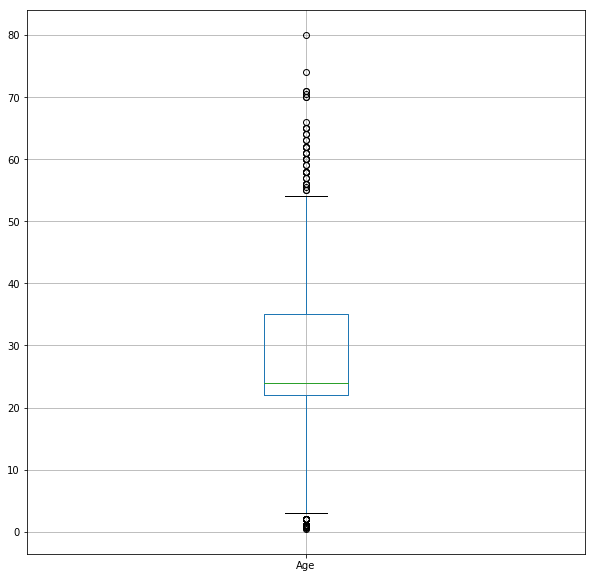

In [0]:
# checking for outliers

plt.subplots(figsize=(10,10))
train.boxplot('Age')

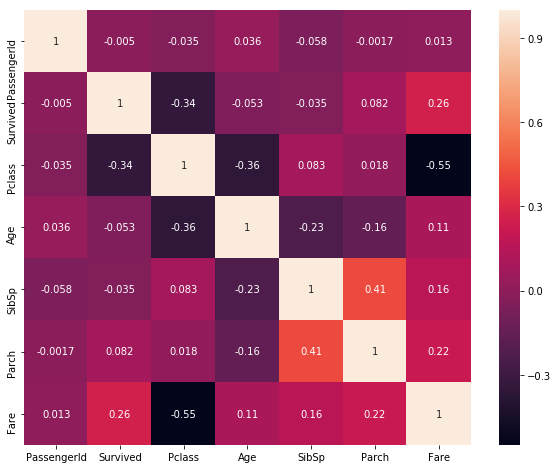

In [0]:
# checking  correlation
f, ax = plt.subplots(figsize=(10, 8))
corr = train.corr()
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
          annot = True)
# there is very  low correaltion  between the varaibles

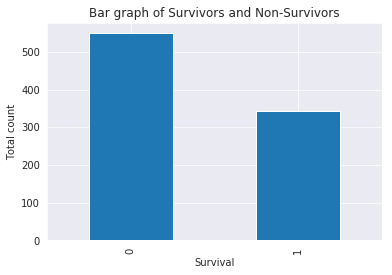

In [0]:
# 
# sns.set_style()
train.groupby('Survived')['Survived'].count().plot(kind='bar')
plt.title('Bar graph of Survivors and Non-Survivors')
plt.xlabel('Survival')
plt.ylabel('Total count')
plt.show()

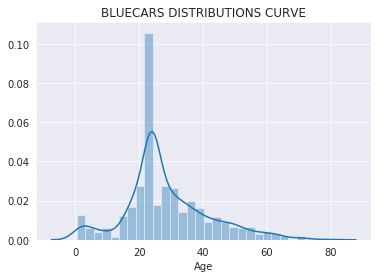

In [0]:
# A bar graph that respresent how age was distibuted in  the train dataset
sns.distplot(train.Age, kde = True)
plt.title('AGE DISTRIBUTIONS CURVE')
plt.show()
# the age of the victim was normally distributed
# most of the victims where in the age blacket of between 20-40

# 5. Feature Engineering

In [0]:
# feature inmportance
import random
importances = random.feature_importances_
names = train.columns
random_1 ={}
for name ,imp in zip(names,importances):
  random_1[name]= imp
random_1
from collections import OrderedDict
OrderedDict(sorted(random_1.items(),key =lambda x:x[1],reverse=True))

In [0]:
# drop columns in both datasets
# in  as much as the columns droped were part of the features they  will contribute very little
# when it comes to modelling and getting accuracy
test.drop(['Name','Ticket','PassengerId'],axis=1,inplace=True)
test.head(1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,2


In [0]:
train.drop(['Name','Ticket','PassengerId'],axis=1,inplace=True)
train.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.25,0


Splitting the  train dataset to 80 - 20  sets.

In [0]:
# seperating my train test to y and x
y = train['Survived']
#x = train.drop(['Survived']).values

cc = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked']
X = train[cc]

In [0]:
 X_train,X_test,y_train,y_test  = train_test_split(X,y, test_size = 0.2, random_state=0)

In [0]:
print(y_train.shape)
print(y_test.shape)
print(X_train.shape)
print(X_test.shape)

(712,)
(179,)
(712, 7)
(179, 7)


Splitting  the train dataset to 70 - 30 set

In [0]:
X_3 = train[cc]
y_3= train['Survived'].values

In [0]:
X_3_train,X_3_test,y_3_train,y_3_test  = train_test_split(X,y, test_size = 0.3, random_state=0)

In [0]:
print(y_3_train.shape)
print(y_3_test.shape)
print(X_3_train.shape)
print(X_3_test.shape)

(623,)
(268,)
(623, 7)
(268, 7)


Splitting the train dataset to 60 - 40 sets


In [0]:
X_4 = train[cc]
y_4= train['Survived'].values

In [0]:
X_4_train,X_4_test,y_4_train,y_4_test  = train_test_split(X,y, test_size = 0.4, random_state=0)

In [0]:
print(y_4_train.shape)
print(y_4_test.shape)
print(X_4_train.shape)
print(X_4_test.shape)

(534,)
(357,)
(534, 7)
(357, 7)


In [0]:
X_t_train,X_t_test,y_t_train,y_t_test  = train_test_split(X,y, test_size = 0.469, random_state=0)

In [0]:
y_t_test.shape

(418,)

# 5. Implementing the Solution


# K-Nearest Neighbors(KNN)

In [0]:
 from sklearn.preprocessing import StandardScaler
 scaler = StandardScaler()
 scaler.fit(X_train)

 X_train =scaler.transform(X_train)
 X_test = scaler.transform(X_test)

In [0]:

# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# lda = LDA(n_components=1)
# X = lda.fit_transform(X, y)
# test = lda.transform(test)

In [0]:
 # training and predicting
 
 classic =KNeighborsClassifier(n_neighbors=50,weights='distance',
                               metric='minkowski',p=4,leaf_size=30)
 classic.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=4,
                     weights='distance')

In [0]:
# predict
# y_pred = classifier.predict(test)
predict_y = classic.predict(X_test)
predict_y

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1])

In [0]:
# Evaluating the Algorithm using  confusion matrix, precision, recall and f1 score 

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predict_y))
print('\n')
print(classification_report(y_test,predict_y))

[[95 15]
 [20 49]]


              precision    recall  f1-score   support

           0       0.83      0.86      0.84       110
           1       0.77      0.71      0.74        69

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



Dataset of 70 -30 sets

In [0]:
# Feature Scaling using standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_3_train)

X_3_train =scaler.transform(X_3_train)
X_3_test = scaler.transform(X_3_test)

In [0]:
# Training and Predictions
 
classic_3 =KNeighborsClassifier(n_neighbors=50,weights='distance',
                               metric='minkowski',p=6,leaf_size=50)
classic_3.fit(X_3_train, y_3_train)

KNeighborsClassifier(algorithm='auto', leaf_size=50, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=6,
                     weights='distance')

In [0]:
# making predictions on our test data(30%)
# ---
# 
y_pred = classic_3.predict(X_3_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [0]:
# Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_3_test, y_pred))
print(classification_report(y_3_test, y_pred))

[[141  27]
 [ 27  73]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       168
           1       0.73      0.73      0.73       100

    accuracy                           0.80       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



Data for 60 -40 set

In [0]:
# Feature Scaling using standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_4_train)

X_4_train =scaler.transform(X_4_train)
X_4_test = scaler.transform(X_4_test)

In [0]:
# Training and Predictions
 
classic_4 =KNeighborsClassifier(n_neighbors=50,weights='distance',
                               metric='minkowski',p=6,leaf_size=50)
classic_4.fit(X_4_train, y_4_train)

KNeighborsClassifier(algorithm='auto', leaf_size=50, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=6,
                     weights='distance')

In [0]:
# making predictions on our test data(30%)

y_4_pred= classic_4.predict(X_4_test)
y_4_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,

In [0]:
# Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_4_test, y_4_pred))
print(classification_report(y_4_test, y_4_pred))

[[190  31]
 [ 43  93]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       221
           1       0.75      0.68      0.72       136

    accuracy                           0.79       357
   macro avg       0.78      0.77      0.78       357
weighted avg       0.79      0.79      0.79       357



Testing our model using test dataset to see its performance.
 we will use KNN model that gave us a higher accuracy and that is the dataset that the model trhat used 80 - 20 sets

In [0]:
predict_test = classic.predict(test)
predict_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,

In [0]:
# Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predict_test))
print(classification_report(y_test, predict_test))

ValueError: ignored

# Dataset 2

# Naive Bayes(NB)
Since the dataset contains both Discrete and continuous variables, we will use multinomial NB.

In [1]:
import pandas as  pd
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:

spam = pd.read_csv('spambase_csv.csv')
spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [3]:
spam['class'].unique()

array([1, 0])

In [0]:


from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB(fit_prior=True,alpha=1.0).fit(X_x, y)

In [0]:
print(confusion_matrix(y_test,predicted))
print('\n')
print(classification_report(y_test,predicted))

[[174  90]
 [ 91  63]]


              precision    recall  f1-score   support

           0       0.66      0.66      0.66       264
           1       0.41      0.41      0.41       154

    accuracy                           0.57       418
   macro avg       0.53      0.53      0.53       418
weighted avg       0.57      0.57      0.57       418



# Challenging the solution